In [2]:
import networkx as nx
import random as rd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import math
import pandas as pd

In [3]:
File_Names = ['a3_b3_g2.1_e2_1.0_1', 'a3_b3_g2.1_e2_1.0_2', 'a3_b3_g2.1_e2_1.0_3', 'a3_b3_g2.1_e2_1.0_4', 'a3_b3_g2.1_e2_1.0_5', 'a3_b3_g2.1_e2_1.0_6', 'a3_b3_g2.1_e2_1.0_7', 'a3_b3_g2.1_e2_1.0_8', 'a3_b3_g2.1_e2_1.0_9', 'a3_b3_g2.1_e2_1.0_10', 'a3_b3_g2.1_e2_1.0_11', 'a3_b3_g2.1_e2_1.0_12', 'a3_b3_g2.1_e2_1.0_13', 'a3_b3_g2.1_e2_1.0_14', 'a3_b3_g2.1_e2_1.0_15', 'a3_b3_g2.1_e2_1.0_16', 'a3_b3_g2.1_e2_1.0_17', 'a3_b3_g2.1_e2_1.0_18', 'a3_b3_g2.1_e2_1.0_19', 'a3_b3_g2.1_e2_1.0_20', 'a3_b3_g2.1_e2_1.0_21', 'a3_b3_g2.1_e2_1.0_22', 'a3_b3_g2.1_e2_1.0_23', 'a3_b3_g2.1_e2_1.0_24', 'a3_b3_g2.1_e2_1.0_25', 'a3_b3_g2.1_e2_1.0_N1200_1', 'a3_b3_g2.1_e2_1.0_N1200_2', 'a3_b3_g2.1_e2_1.0_N1200_3', 'a3_b3_g2.1_e2_1.0_N1200_4', 'a3_b3_g2.1_e2_1.0_N1200_5', 'a3_b3_g2.1_e2_1.0_N1200_6', 'a3_b3_g2.1_e2_1.0_N1200_7', 'a3_b3_g2.1_e2_1.0_N1200_8', 'a3_b3_g2.1_e2_1.0_N1400_1', 'a3_b3_g2.1_e2_1.0_N1400_2', 'a3_b3_g2.1_e2_1.0_N1400_3', 'a3_b3_g2.1_e2_1.0_N1400_4', 'a3_b3_g2.1_e2_1.0_N1400_5', 'a3_b3_g2.1_e2_1.0_N1400_6', 'a3_b3_g2.1_e2_1.0_N1400_7', 'a3_b3_g2.1_e2_1.0_N1400_8', 'a3_b3_g2.1_e2_1.0_N1600_1', 'a3_b3_g2.1_e2_1.0_N1600_2', 'a3_b3_g2.1_e2_1.0_N1600_3', 'a3_b3_g2.1_e2_1.0_N1600_4', 'a3_b3_g2.1_e2_1.0_N1600_5', 'a3_b3_g2.1_e2_1.0_N1600_6', 'a3_b3_g2.1_e2_1.0_N1600_7', 'a3_b3_g2.1_e2_1.0_N1600_8', 'a3_b3_g2.1_e2_1.0_N1800_1', 'a3_b3_g2.1_e2_1.0_N1800_2', 'a3_b3_g2.1_e2_1.0_N1800_3', 'a3_b3_g2.1_e2_1.0_N1800_4', 'a3_b3_g2.1_e2_1.0_N1800_5', 'a3_b3_g2.1_e2_1.0_N1800_6', 'a3_b3_g2.1_e2_1.0_N1800_7', 'a3_b3_g2.1_e2_1.0_N1800_8', 'a3_b3_g2.1_e2_1.0_N2000_1', 'a3_b3_g2.1_e2_1.0_N2000_2', 'a3_b3_g2.1_e2_1.0_N2000_3', 'a3_b3_g2.1_e2_1.0_N2000_4', 'a3_b3_g2.1_e2_1.0_N2000_5', 'a3_b3_g2.1_e2_1.0_N2000_6']

g = globals()

files = len(File_Names)

for i in range(files):
    g[f"data{i+1}"] = np.loadtxt(f'D:\Daten mit Änderungen\Physik\Bachelorarbeit\Generated_Data\{File_Names[i]}.csv', delimiter=',')

y-intercept: -1.7627979299729333
slope: [0.08349258]
R²: 0.6395044725494261


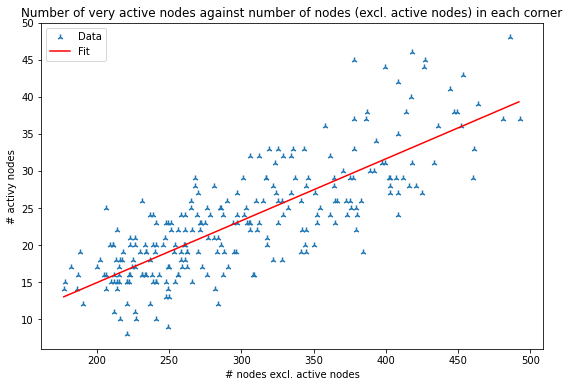

In [4]:
### Looking for correlation between number of extremely active nodes and number of nodes in each polarization corner

# Splitting each dataset into 4:

for i in range(files):
    N = len(g[f"data{i+1}"][0])
    ord = np.zeros(N)
    for j in range(N):

        iter = 10
        # Aggregate opinion over last iter iterations to reduce influence of fluctuations
        # This assumes numerical stability over last iterations!
        op1 = 0
        op2 = 0
        for k in range(iter):
            op1 += g[f"data{i+1}"][len(g[f"data{i+1}"])-2-2*k][j]
            op2 += g[f"data{i+1}"][len(g[f"data{i+1}"])-1-2*k][j]
        op1 = op1/iter
        op2 = op2/iter
        
        # ord saves quadrant of node in scatter plot (op1 x, op2 y), ord[i]==1 top right, ord[i]==2 top left and so on
        if op1 > 0:
            if op2 > 0:
                ord[j] = 1
            else: 
                ord[j] = 4
        else:
            if op2 > 0:
                ord[j] = 2
            else: 
                ord[j] = 3
                
    # Now creating 4 datasets saving the only node's activity in the dataset corresponding to its corner
    for j in range(4):
        g[f"data{i+1}_corn{j+1}"] = []

    for j in range(N):
        if ord[j] == 1:
            g[f"data{i+1}_corn1"].append( g[f"data{i+1}"][0][j] )
        if ord[j] == 2:
            g[f"data{i+1}_corn2"].append( g[f"data{i+1}"][0][j] )
        if ord[j] == 3:
            g[f"data{i+1}_corn3"].append( g[f"data{i+1}"][0][j] )
        if ord[j] == 4:
            g[f"data{i+1}_corn4"].append( g[f"data{i+1}"][0][j] )

# Going through the datasets and counting # of nodes with activity smaller and bigger than act_thresh
act_thresh = 0.10

# first column of count_arr # is number of nodes with activity below a_thresh
count_arr = np.zeros((files*4, 2))
for i in range(files):
    for j in range(4):
        for k in range( len(g[f"data{i+1}_corn{j+1}"]) ):
            act = g[f"data{i+1}_corn{j+1}"][k]
            if act < act_thresh: 
                count_arr[i*4+j][0] += 1
            if act >= act_thresh: 
                count_arr[i*4+j][1] += 1

# Plotting # of nodes with activity > act_thresh against # those with activity < act_thresh + Linear fit
# Fit data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
x = np.array(count_arr[:,0])
x = x.reshape(-1, 1)
y = np.array(count_arr[:,1])

lin_reg.fit(X=x, y=y)

print("y-intercept:", lin_reg.intercept_)
print("slope:", lin_reg.coef_)
print("R²:", lin_reg.score(x, y))

# Plot fit and data
def f(x):
    return lin_reg.intercept_ + x*lin_reg.coef_

min = np.min(x)
max = np.max(x)
arr = np.arange(min, max)

plt.figure(figsize=(9,6))
plt.scatter(count_arr[:,0], count_arr[:,1], label="Data", marker="2")
plt.plot(arr, f(arr), label="Fit", color="r")
plt.xlabel("# nodes excl. active nodes")
plt.ylabel("# activy nodes")
plt.title("Number of very active nodes against number of nodes (excl. active nodes) in each corner")
plt.legend()
plt.show()

### Still have to show that polarization remains for different values of N


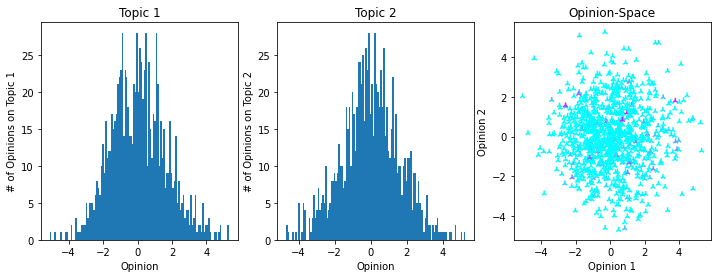

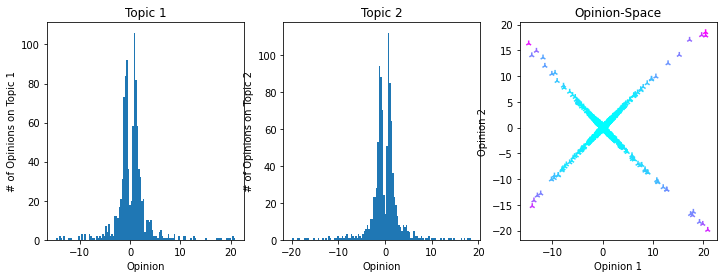

In [5]:
def Plot_Opinion_Distribution_2d(data1, data2, data_act):
    op1_list = data1
    op2_list = data2
    op1_counts = Counter(op1_list)
    op2_counts = Counter(op2_list)

    fig, ax = plt.subplots(1,3, figsize=(12,4))
    ax[0].set_title("Topic 1")
    ax[0].set_xlabel("Opinion")
    ax[0].set_ylabel("# of Opinions on Topic 1")
    ax[0].hist(op1_list, bins=120)
    ax[1].set_title("Topic 2")
    ax[1].set_xlabel("Opinion")
    ax[1].set_ylabel("# of Opinions on Topic 2")
    ax[1].hist(op2_list, bins=120)
    ax[2].set_title("Opinion-Space")
    ax[2].set_xlabel("Opinion 1")
    ax[2].set_ylabel("Opinion 2")
    ax[2].scatter(op1_list, op2_list, c=data_act, cmap='cool', marker = '2')
    plt.show()

Plot_Opinion_Distribution_2d(data1[1], data1[2], data1[0])
Plot_Opinion_Distribution_2d(data1[len(data1)-2], data1[len(data1)-1], data1[0])